## 男女之間在申請信用貸款上是否有所差異?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


type,mean,sd
male,611095.2,411524.2
femael,592766.7,397581.6
total,599028.6,402492.6


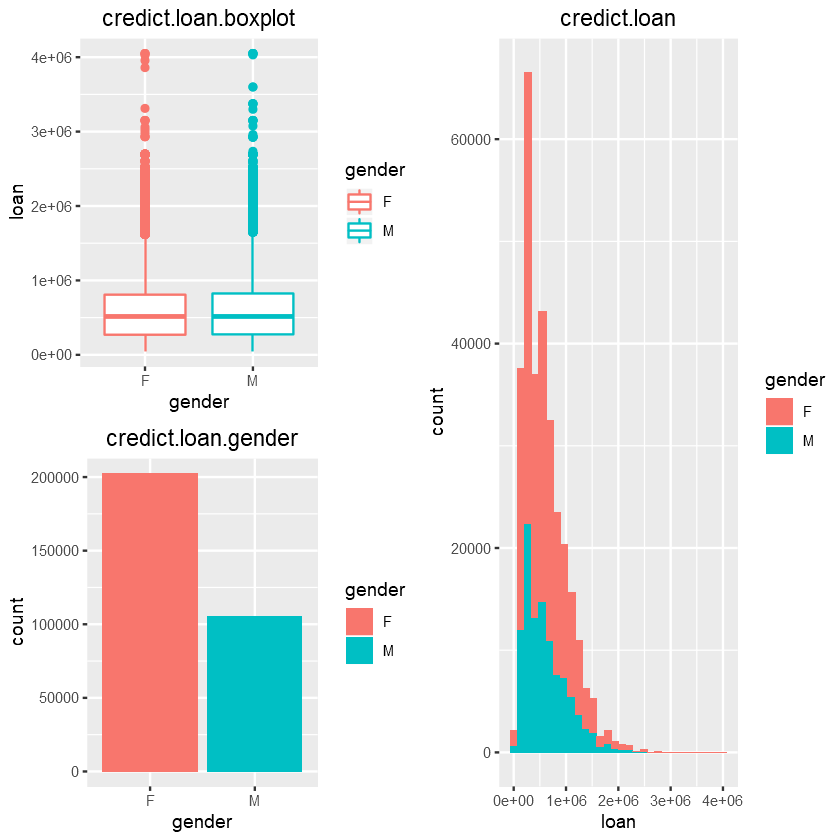

In [5]:
data=read.csv('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\application_train.csv')

#計算任意欄位的平均數及標準差 : credict loan of client
credict.loan=data.frame(loan=data$AMT_CREDIT,gender=data$CODE_GENDER,child=as.factor(data$CNT_CHILDREN))

## 去除gender XNA 
xna.loc=which(data$CODE_GENDER=='XNA')
credict.loan=credict.loan[-xna.loc,]
female.means.loan=mean(credict.loan$loan[which(credict.loan$gender=='F')])
male.means.loan=mean(credict.loan$loan[which(credict.loan$gender=='M')])
mean.loan=mean(credict.loan$loan)

female.sd.loan=sd(credict.loan$loan[which(credict.loan$gender=='F')])
male.sd.loan=sd(credict.loan$loan[which(credict.loan$gender=='M')])
sd.loan=sd(credict.loan$loan)

fin.data=data.frame(type=c('male','femael','total'),
                    mean=c(male.means.loan,female.means.loan,mean.loan),
                    sd=c(male.sd.loan,female.sd.loan,sd.loan))


library(ggplot2)
library(gridExtra)

#boxplot
box.plot=ggplot(data=credict.loan,aes(x=gender,y=loan))+
  geom_boxplot(aes(color=gender))+ggtitle('credict.loan.boxplot')+
  theme(plot.title = element_text(hjust = 0.5))


##根據boxplot，顯示男女之間在信用貸款上的金額是差不多的 

#畫出任意欄位的直方圖
plot=ggplot(data=credict.loan,aes(x=loan))+geom_histogram(aes(fill=gender))+
  ggtitle('credict.loan')+theme(plot.title = element_text(hjust = 0.5))
  

# 從此histrogram，同樣顯示男女的信用貸款金額是差不多的，

# 長條圖
plot.bar=ggplot(data=credict.loan,aes(x=gender))+geom_bar(aes(fill=gender))+
  ggtitle('credict.loan.gender')+theme(plot.title = element_text(hjust = 0.5))


# 相較於男生，女生較常申請信用貸款

grid.arrange(arrangeGrob(box.plot, plot.bar),plot, ncol =2)


fin.data


## 總結
#### (1) 男生申請的平均金額為611095.2；女生申請的平均金額為592766.7；整體平均為599028.6。
#### (2) 根據boxplot與histrogram，大致上男女之間的申請金額是差不多的。
#### (3) 在申請信用貸款的人數中，女生的人數是男生的兩倍左右，代表相較於男生，女生較容易會去申請信用貸款。

## 小孩數量與貸款金額之間的關係

child,mean
0,599104.3
1,595643.4
2,604839.6
3,607895.6
4,618222.7
5,571460.9
6,523736.1
7,457944.4
8,497520.0
9,583285.5


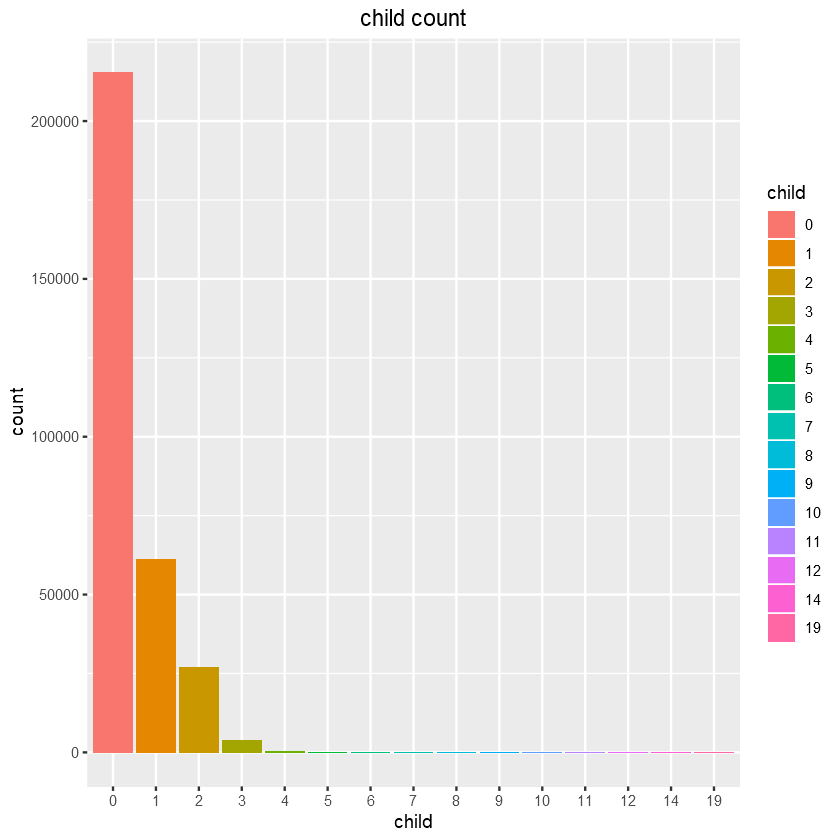

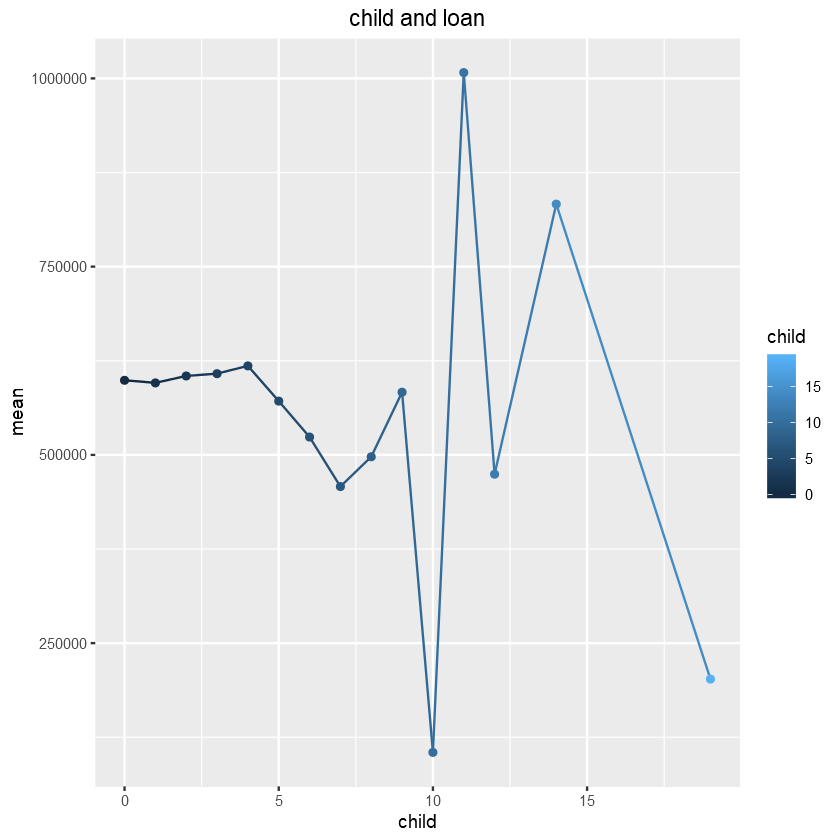

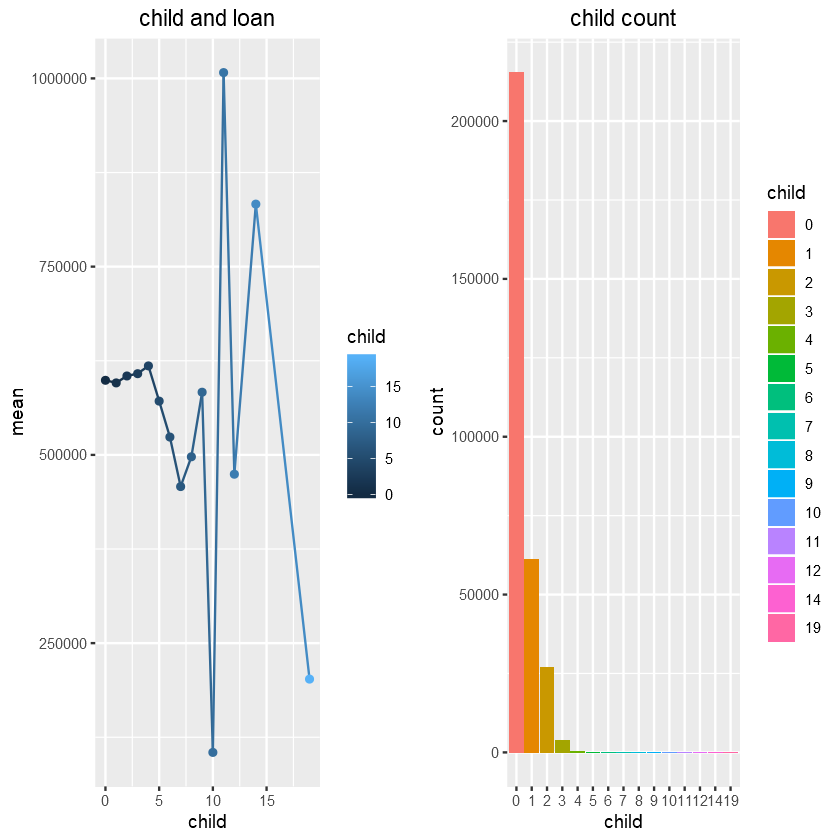

In [6]:
## 小孩數量是否與信用貸款相關?

for (i in c(0,1,2,3,4,5,6,7,8,9,10,11,12,14,19)) {
  assign(paste('mean.child',i,sep=''),mean(credict.loan$loan[which(credict.loan$child==i)]))
}

child.loan=data.frame(child=c(0,1,2,3,4,5,6,7,8,9,10,11,12,14,19),
                      mean=c(mean.child0,
                        mean.child1,mean.child2,mean.child3,
                              mean.child4,mean.child5,mean.child6,
                              mean.child7,mean.child8,mean.child9,
                              mean.child10,mean.child11,mean.child12,
                              mean.child14,mean.child19))
child.loan
plot.child=ggplot(data=credict.loan,aes(x=child) )+
  geom_bar(aes(fill=child))+ggtitle('child count')+
  theme(plot.title = element_text(hjust = 0.5))
plot.child

plot.loan.child=ggplot(data=child.loan,aes(x=child,y=mean))+
  geom_line(aes(color=child))+geom_point(aes(color=child))+ggtitle('child and loan')+
  theme(plot.title = element_text(hjust = 0.5))
plot.loan.child

grid.arrange(plot.loan.child,plot.child,ncol =2)


## 總結
#### (1) 大部分的人都沒有小孩
#### (2) 原以為小孩越多貸款的金額越高，但是從折線圖中發現，小孩的數量與貸款金額之間並沒有顯示強烈的關係，甚至沒有小孩的貸款金額反而也很高